<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [15]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [16]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [17]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


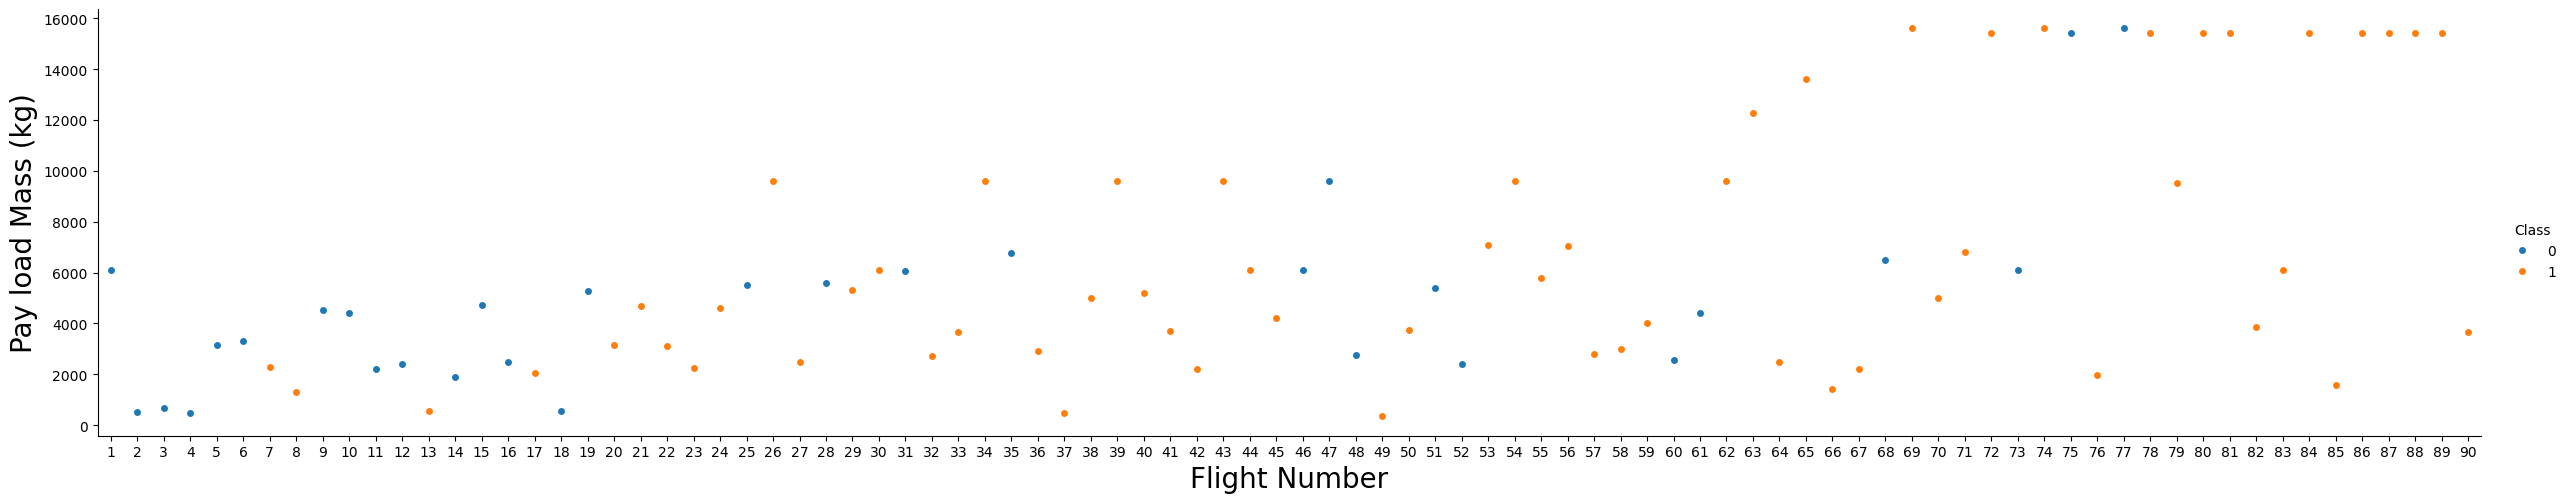

In [18]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


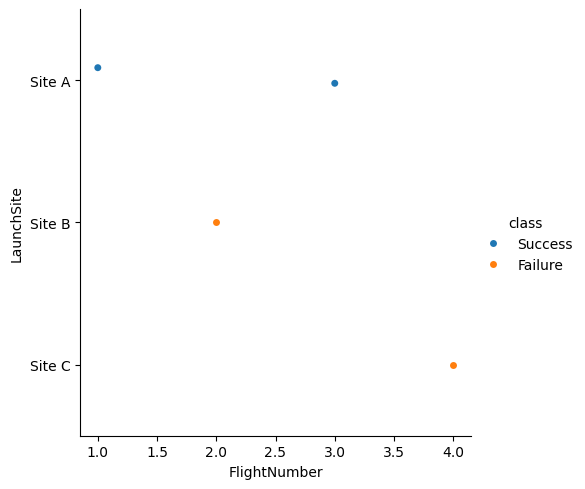

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace it with your actual data)
import pandas as pd
data = {
    'FlightNumber': [1, 2, 3, 4],
    'LaunchSite': ['Site A', 'Site B', 'Site A', 'Site C'],
    'class': ['Success', 'Failure', 'Success', 'Failure']
}
df = pd.DataFrame(data)

# Create the catplot
sns.catplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='class',
    kind='strip'  # 'strip' is commonly used for categorical plots
)

# Show the plot
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


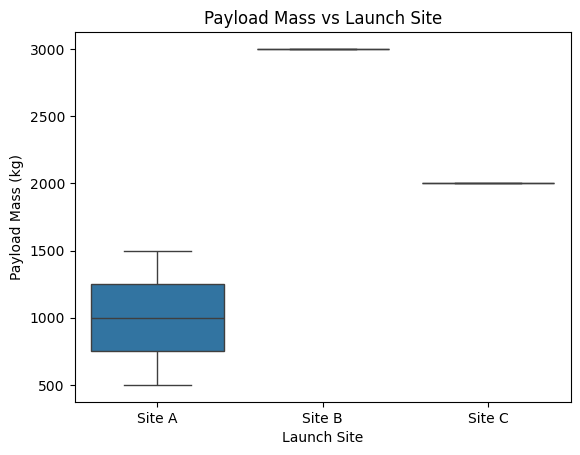

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace it with your actual data)
import pandas as pd
data = {
    'PayloadMass': [500, 3000, 1500, 2000],
    'LaunchSite': ['Site A', 'Site B', 'Site A', 'Site C']
}
df = pd.DataFrame(data)

# Create a boxplot to observe the relationship
sns.boxplot(data=df, x='LaunchSite', y='PayloadMass')

# Add labels and title
plt.xlabel('Launch Site')
plt.ylabel('Payload Mass (kg)')
plt.title('Payload Mass vs Launch Site')

# Show the plot
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


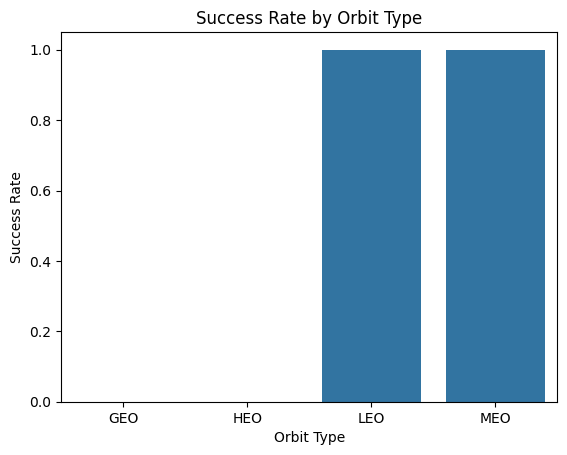

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'OrbitType': ['LEO', 'GEO', 'LEO', 'MEO', 'HEO'],
    'Class': [1, 0, 1, 1, 0]  # 1 for success, 0 for failure
}
df = pd.DataFrame(data)

# Calculate success rate for each orbit
success_rate = df.groupby('OrbitType')['Class'].mean().reset_index()
success_rate.rename(columns={'Class': 'SuccessRate'}, inplace=True)

# Create the bar chart
sns.barplot(data=success_rate, x='OrbitType', y='SuccessRate')

# Add labels and title
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')

# Show the plot
plt.show()


Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


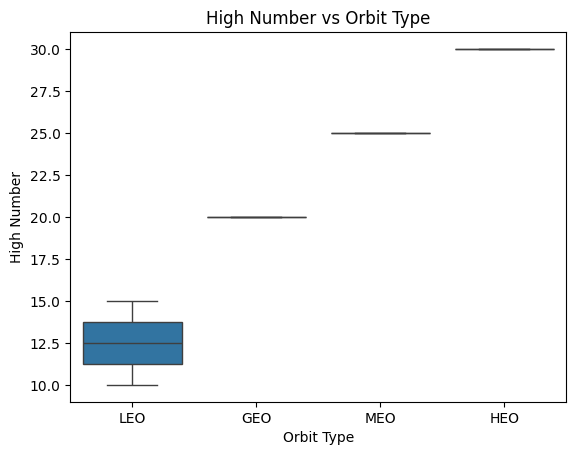

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'OrbitType': ['LEO', 'GEO', 'LEO', 'MEO', 'HEO'],
    'HighNumber': [10, 20, 15, 25, 30]
}
df = pd.DataFrame(data)

# Create a boxplot to visualize the relationship
sns.boxplot(data=df, x='OrbitType', y='HighNumber')

# Add labels and title
plt.xlabel('Orbit Type')
plt.ylabel('High Number')
plt.title('High Number vs Orbit Type')

# Show the plot
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


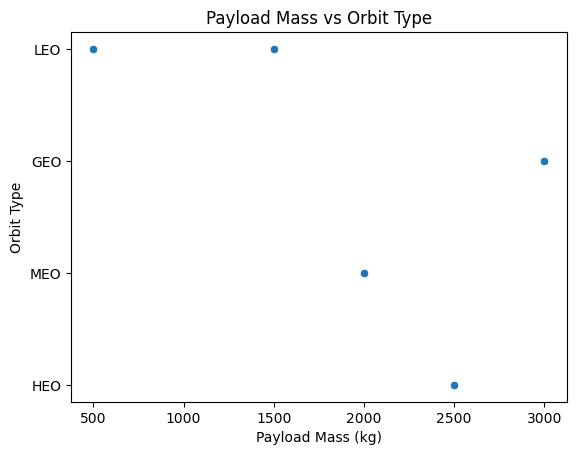

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'PayloadMass': [500, 3000, 1500, 2000, 2500],
    'OrbitType': ['LEO', 'GEO', 'LEO', 'MEO', 'HEO']
}
df = pd.DataFrame(data)

# Create a scatter plot
sns.scatterplot(data=df, x='PayloadMass', y='OrbitType')

# Add labels and title
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.title('Payload Mass vs Orbit Type')

# Show the plot
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [29]:
# Import pandas library
import pandas as pd

# Sample DataFrame with a 'Date' column
data = {'Date': ['2025-03-10', '2024-01-15', '2023-12-20']}
df = pd.DataFrame(data)

# Function to extract years from the 'Date' column
def extract_year():
    # Check if 'Date' column exists in DataFrame
    if 'Date' in df.columns:
        # Extract year from each date
        df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
    else:
        raise KeyError("'Date' column is missing in the DataFrame!")

# Call the function
extract_year()

# View the updated DataFrame
print(df.head())


         Date  Year
0  2025-03-10  2025
1  2024-01-15  2024
2  2023-12-20  2023


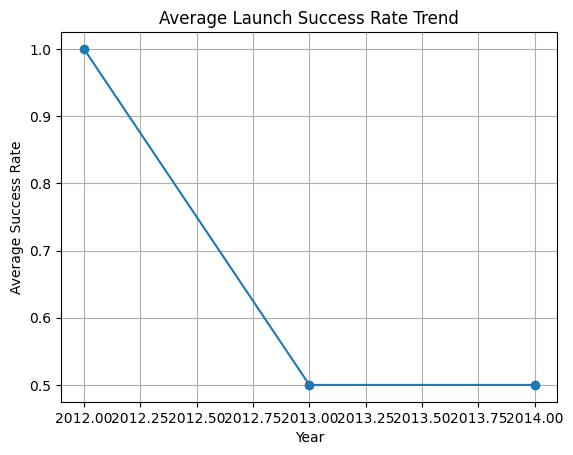

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace it with your actual data)
data = {
    'Date': ['2012-01-01', '2013-02-15', '2013-05-20', '2014-03-18', '2014-08-22'],
    'Class': [1, 0, 1, 1, 0]  # 1 for success, 0 for failure
}
df = pd.DataFrame(data)

# Convert the 'Date' column to datetime format and extract the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Calculate the average success rate for each year
average_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Plot the line chart
plt.plot(average_success_rate['Year'], average_success_rate['Class'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.title('Average Launch Success Rate Trend')

# Show the plot
plt.grid(True)
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [26]:
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4],
    'PayloadMass': [500, 3000, 1500, 2000],
    'Orbit': ['LEO', 'GEO', 'LEO', 'MEO'],
    'LaunchSite': ['Site A', 'Site B', 'Site A', 'Site C'],
    'Flights': [10, 12, 5, 8],
    'GridFins': [True, True, False, True],
    'Reused': [False, True, False, True],
    'Legs': [True, True, False, False],
    'LandingPad': ['LP-1', 'LP-2', 'LP-1', 'LP-3'],
    'Block': [5, 3, 4, 4],
    'ReusedCount': [0, 1, 0, 2],
    'Serial': ['B0001', 'B0002', 'B0003', 'B0004']
}
df = pd.DataFrame(data)

# Select the features for success prediction
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Display the first few rows of the features DataFrame
print(features.head())


   FlightNumber  PayloadMass Orbit LaunchSite  Flights  GridFins  Reused  \
0             1          500   LEO     Site A       10      True   False   
1             2         3000   GEO     Site B       12      True    True   
2             3         1500   LEO     Site A        5     False   False   
3             4         2000   MEO     Site C        8      True    True   

    Legs LandingPad  Block  ReusedCount Serial  
0   True       LP-1      5            0  B0001  
1   True       LP-2      3            1  B0002  
2  False       LP-1      4            0  B0003  
3  False       LP-3      4            2  B0004  


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [27]:
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'FlightNumber': [1, 2, 3, 4],
    'PayloadMass': [500, 3000, 1500, 2000],
    'Orbit': ['LEO', 'GEO', 'LEO', 'MEO'],
    'LaunchSite': ['Site A', 'Site B', 'Site A', 'Site C'],
    'Flights': [10, 12, 5, 8],
    'GridFins': [True, True, False, True],
    'Reused': [False, True, False, True],
    'Legs': [True, True, False, False],
    'LandingPad': ['LP-1', 'LP-2', 'LP-1', 'LP-3'],
    'Block': [5, 3, 4, 4],
    'ReusedCount': [0, 1, 0, 2],
    'Serial': ['B0001', 'B0002', 'B0003', 'B0004']
}
df = pd.DataFrame(data)

# Select the features for success prediction
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply one-hot encoding to the specified columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the resulting DataFrame
print(features_one_hot.head())


   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1          500       10      True   False   True      5   
1             2         3000       12      True    True   True      3   
2             3         1500        5     False   False  False      4   
3             4         2000        8      True    True  False      4   

   ReusedCount  Orbit_GEO  Orbit_LEO  ...  LaunchSite_Site A  \
0            0      False       True  ...               True   
1            1       True      False  ...              False   
2            0      False       True  ...               True   
3            2      False      False  ...              False   

   LaunchSite_Site B  LaunchSite_Site C  LandingPad_LP-1  LandingPad_LP-2  \
0              False              False             True            False   
1               True              False            False             True   
2              False              False             True            False   
3    

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [28]:
# Ensure the entire DataFrame is cast to float64 type
features_one_hot = features_one_hot.astype('float64')

# Display the first few rows to confirm the change
print(features_one_hot.head())


   FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0           1.0        500.0     10.0       1.0     0.0   1.0    5.0   
1           2.0       3000.0     12.0       1.0     1.0   1.0    3.0   
2           3.0       1500.0      5.0       0.0     0.0   0.0    4.0   
3           4.0       2000.0      8.0       1.0     1.0   0.0    4.0   

   ReusedCount  Orbit_GEO  Orbit_LEO  ...  LaunchSite_Site A  \
0          0.0        0.0        1.0  ...                1.0   
1          1.0        1.0        0.0  ...                0.0   
2          0.0        0.0        1.0  ...                1.0   
3          2.0        0.0        0.0  ...                0.0   

   LaunchSite_Site B  LaunchSite_Site C  LandingPad_LP-1  LandingPad_LP-2  \
0                0.0                0.0              1.0              0.0   
1                1.0                0.0              0.0              1.0   
2                0.0                0.0              1.0              0.0   
3         

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
